1. Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas
hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.
- 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se
identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se
identificaron como heterosexuales. El objetivo era medir actitudes frente a la
adopción homoparental. La organización encargada de procesar los datos obtuvo
los siguientes resultados:

  - El 67% de los encuestados por heterosexuales se mostró a favor de la
  adopción homoparental, mientras que un 72% de los encuestados por
  activistas que se identificaron como homosexuales se mostraron a favor
  de la adopción homoparental.
  - Asumiendo que la hipótesis nula es que ambos porcentajes no son
  diferentes, y la hipótesis alternativa es que existe una diferencia
  substancial entre ambos.
  - Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la
  alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima
  con la que sería posible rechazar la hipótesis nula en favor de la alternativa
  con estos resultados?

- Hipotesis Nula: Las medias de ambos encuestados son iguales **Hhet = Hhom**
- Hipotesis Alternativa: Las medias de ambos encuestados no son iguales **Hhet != Hhom**

Teniendo un valor p = 0.1183 es imposible rechazar la hipotesis nula con un valor de confianza
del 95%. Esto indica que ambos grupos encuestados tienen un porcentaje de encuestados a favor
de la adopcion homoparental igual.

Para rechazar la hipotesis nula se necesitaria un valor p de por lo menos 0.1184. Por lo tanto, 
con un grado de confianza del 11.84% se podria decir que ambos grupos son distintos entre si.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind


In [2]:
df = pd.read_csv('nations.csv', encoding='iso-8859-1', index_col=0)


In [3]:
df['is_Africa'] = np.where(df['region'] == 'Africa', 1, 0)
df['is_Americas'] = np.where(df['region'] == 'Americas', 1, 0)
df['is_Asia'] = np.where(df['region'] == 'Asia', 1, 0)
df['is_Europe'] = np.where(df['region'] == 'Europe', 1, 0)
df['is_Oceania'] = np.where(df['region'] == 'Oceania', 1, 0)

variables = ['femlab', 'literacy', 'school']


In [31]:
def prueba_hipotesis(df, variable, binarize):
    '''Funcion que calcula el test t de student para dos muestras independientes. Analiza la
    variable indicada por el usuario, y separa los datos en dos grupos segun el argumento
    binarize

    :param df: Es el dataframe que contiene todos los datos
    :type df: pd.DataFrame

    :param variable: Es la columna o variable que se quiere analizar
    :type variable: str

    :param binarize: Es la columna que se quiere utilizar para separar en dos grupos el dataframe
    :type binarize: str

    :return: Nada
    :rtype: None
    '''
    grupo_0 = df[df[binarize] == 0][variable].dropna()
    grupo_1 = df[df[binarize] == 1][variable].dropna()

    media_grupo_0 = np.mean(grupo_0)
    media_grupo_1 = np.mean(grupo_1)

    diferencias_media = media_grupo_0 - media_grupo_1

    statistic, pvalue = ttest_ind(grupo_0, grupo_1)

    if pvalue < 0.05:
        hay_diferencia_estadistica = True

    else:
        hay_diferencia_estadistica = False

    print(f'> Media Grupo 0 {binarize} - {variable}: {media_grupo_0} \n'
          f'> Media Grupo 1 {binarize} - {variable}: {media_grupo_1} \n'
          f'> La diferencia entre medias fue de: {diferencias_media} \n\n'
          f'> Valor t: {statistic} \n'
          f'> Valor p: {pvalue} \n\n'
          f'> Hay diferencia estadistica: {hay_diferencia_estadistica}')


In [33]:
prueba_hipotesis(df, 'gdp', 'is_Americas')

> Media Grupo 0 is_Americas - gdp: 12454.322363866519 
> Media Grupo 1 is_Americas - gdp: 10634.03789358428 
> La diferencia entre medias fue de: 1820.2844702822385 

> Valor t: 0.6763126232164977 
> Valor p: 0.49972496437556313 

> Hay diferencia estadistica: False


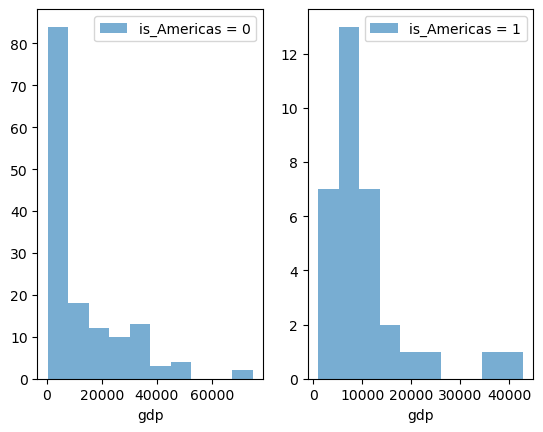

In [58]:
def graficar_histogramas_dos_poblaciones(df, variable, binarize):
    '''Funcion que grafica la distribucion de datos de un dataframe. El dataframe es separado en
    dos grupos segun el argumento binarize. Finalmente, se grafica la distribucion de datos 
    de la columna "variable".

    :param df: Es el dataframe que contiene todos los datos
    :type df: pd.DataFrame

    :param variable: Es la columna que contiene los datos a analizar
    :type variable: str

    :param binarize: Es la columna que se quiere utilizar para separar el dataframe en 2
    :type binarize: str

    :return: Nada
    :rtype: None 
    '''

    grupo_0 = df[df[binarize] == 0][variable].dropna()
    grupo_1 = df[df[binarize] == 1][variable].dropna()

    plt.subplot(1, 2, 1)
    plt.hist(grupo_0, alpha=0.6, label=f'{binarize} = 0')
    plt.xlabel(variable)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(grupo_1, alpha=0.6, label=f'{binarize} = 1')
    plt.xlabel(variable)
    plt.legend()

    plt.show()


graficar_histogramas_dos_poblaciones(df, 'gdp', 'is_Americas')


---------------------------------------------------------------------
> Media Grupo 0 is_Africa - femlab: 0.6761015881858174 
> Media Grupo 1 is_Africa - femlab: 0.7299098010156669 
> La diferencia entre medias fue de: -0.05380821282984949 

> Valor t: -1.783872878266046 
> Valor p: 0.0761771840435915 

> Hay diferencia estadistica: False


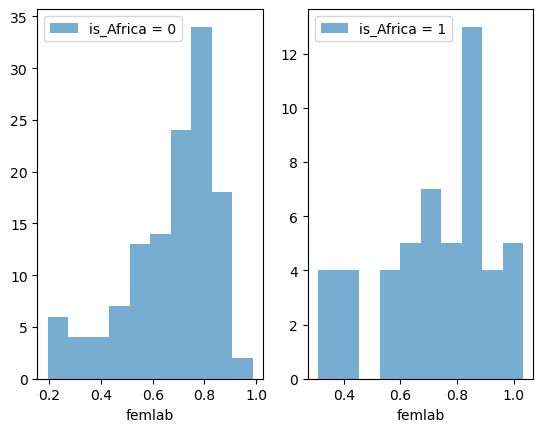

> Media Grupo 0 is_Africa - literacy: 90.19857935471968 
> Media Grupo 1 is_Africa - literacy: 65.30851067887976 
> La diferencia entre medias fue de: 24.890068675839927 

> Valor t: 8.909991173873895 
> Valor p: 3.3857112156459963e-15 

> Hay diferencia estadistica: True


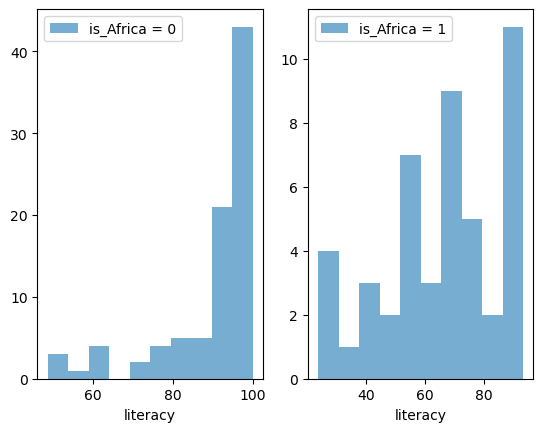

> Media Grupo 0 is_Africa - school: 8.5523114274018 
> Media Grupo 1 is_Africa - school: 4.522875827901504 
> La diferencia entre medias fue de: 4.029435599500297 

> Valor t: 10.415811831777058 
> Valor p: 2.6352830456717332e-20 

> Hay diferencia estadistica: True


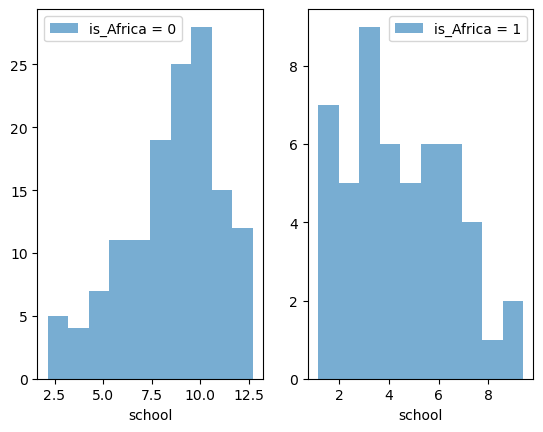

---------------------------------------------------------------------
> Media Grupo 0 is_Americas - femlab: 0.700280820772256 
> Media Grupo 1 is_Americas - femlab: 0.6507483913052466 
> La diferencia entre medias fue de: 0.04953242946700931 

> Valor t: 1.3731113408683462 
> Valor p: 0.1714745430099794 

> Hay diferencia estadistica: False


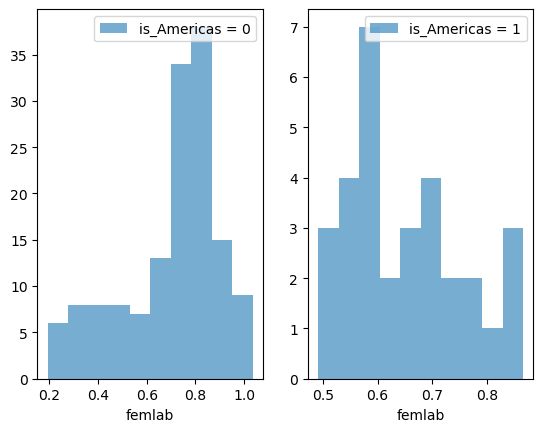

> Media Grupo 0 is_Americas - literacy: 80.18217380357825 
> Media Grupo 1 is_Americas - literacy: 89.30124988555909 
> La diferencia entre medias fue de: -9.119076081980836 

> Valor t: -1.953805549546212 
> Valor p: 0.05282297025501065 

> Hay diferencia estadistica: False


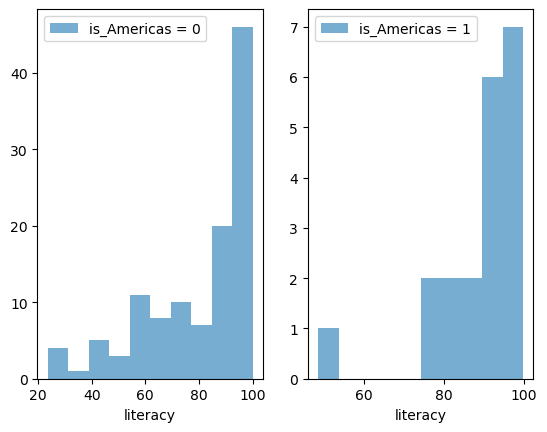

> Media Grupo 0 is_Americas - school: 7.318845326604408 
> Media Grupo 1 is_Americas - school: 8.072857080187116 
> La diferencia entre medias fue de: -0.7540117535827084 

> Valor t: -1.362827174571195 
> Valor p: 0.17458464986808925 

> Hay diferencia estadistica: False


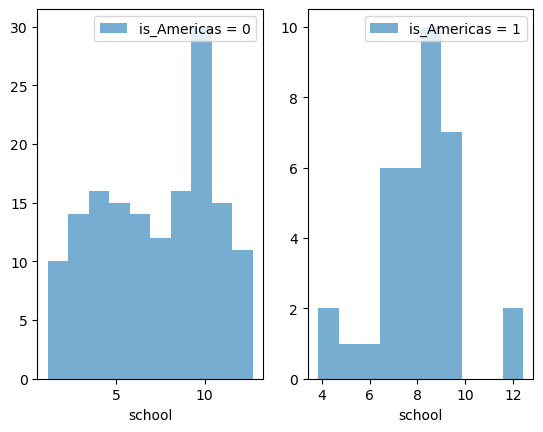

---------------------------------------------------------------------
> Media Grupo 0 is_Asia - femlab: 0.7223421863745898 
> Media Grupo 1 is_Asia - femlab: 0.6113142879033575 
> La diferencia entre medias fue de: 0.11102789847123229 

> Valor t: 3.7455196595318414 
> Valor p: 0.00024413257519365062 

> Hay diferencia estadistica: True


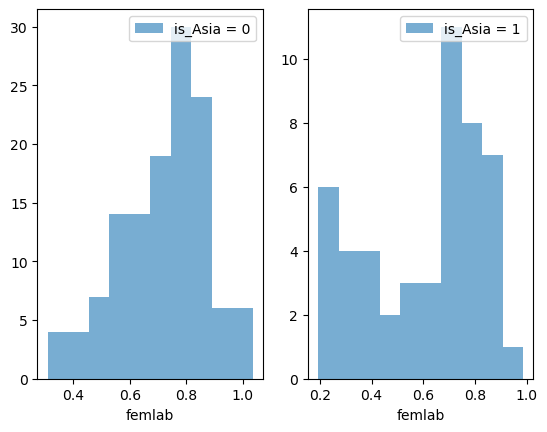

> Media Grupo 0 is_Asia - literacy: 78.99281917734349 
> Media Grupo 1 is_Asia - literacy: 87.3573166451803 
> La diferencia entre medias fue de: -8.364497467836813 

> Valor t: -2.3336279461015885 
> Valor p: 0.021114460773250368 

> Hay diferencia estadistica: True


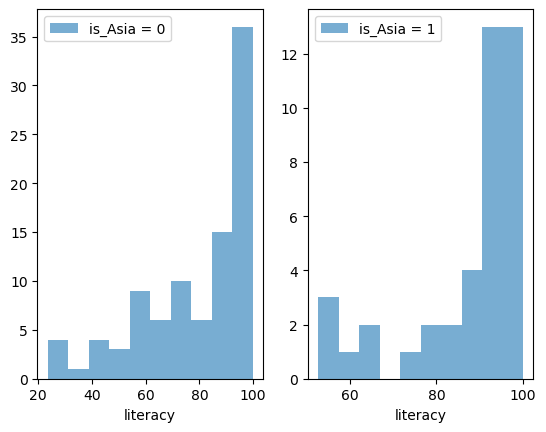

> Media Grupo 0 is_Asia - school: 7.52714284658432 
> Media Grupo 1 is_Asia - school: 7.261111130317052 
> La diferencia entre medias fue de: 0.2660317162672685 

> Valor t: 0.5363879996523622 
> Valor p: 0.5923313578645575 

> Hay diferencia estadistica: False


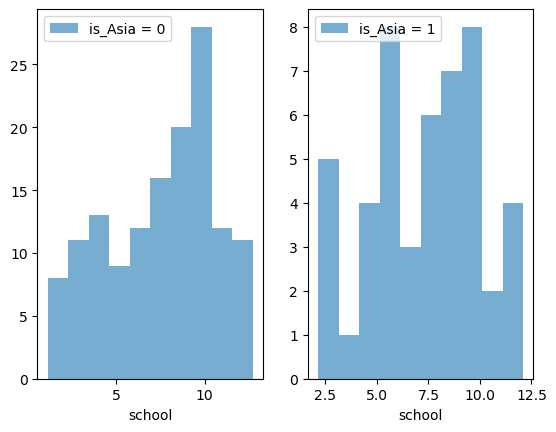

---------------------------------------------------------------------
> Media Grupo 0 is_Europe - femlab: 0.6704557155924183 
> Media Grupo 1 is_Europe - femlab: 0.7716324264938766 
> La diferencia entre medias fue de: -0.1011767109014583 

> Valor t: -3.063523760334362 
> Valor p: 0.0025335604834548654 

> Hay diferencia estadistica: True


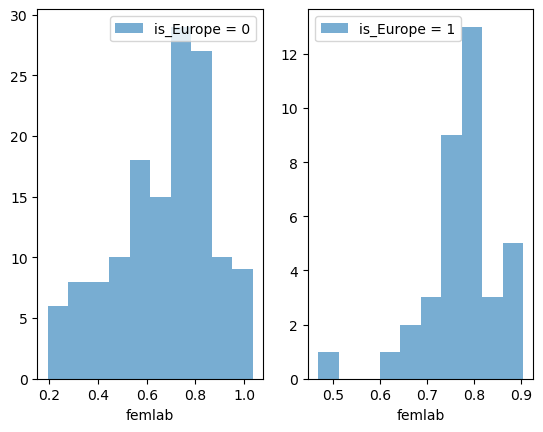

> Media Grupo 0 is_Europe - literacy: 78.2926989698832 
> Media Grupo 1 is_Europe - literacy: 98.17727279663086 
> La diferencia entre medias fue de: -19.884573826747655 

> Valor t: -4.718431498213321 
> Valor p: 5.935608765865936e-06 

> Hay diferencia estadistica: True


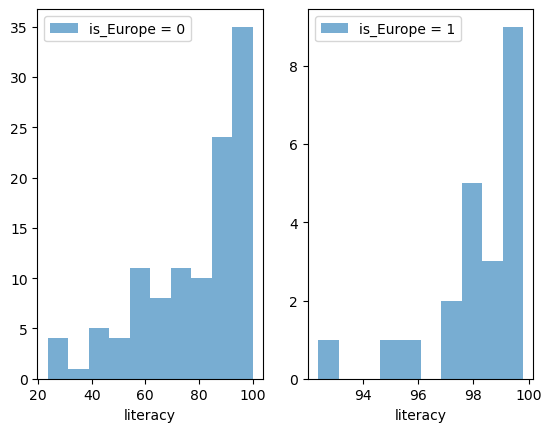

> Media Grupo 0 is_Europe - school: 6.632993203442113 
> Media Grupo 1 is_Europe - school: 10.421544679781281 
> La diferencia entre medias fue de: -3.788551476339168 

> Valor t: -8.524346217730443 
> Valor p: 5.20910302336092e-15 

> Hay diferencia estadistica: True


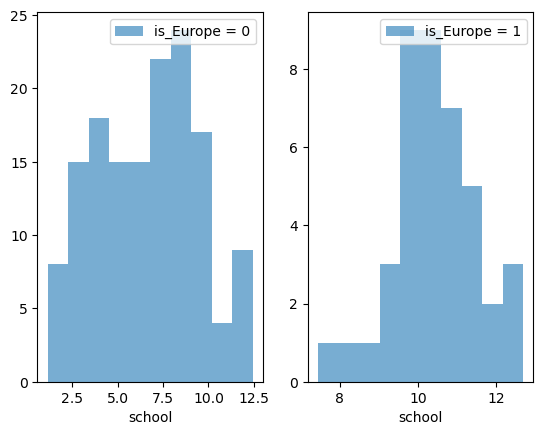

---------------------------------------------------------------------
> Media Grupo 0 is_Oceania - femlab: 0.6899011897011882 
> Media Grupo 1 is_Oceania - femlab: 0.7234222326013777 
> La diferencia entre medias fue de: -0.033521042900189535 

> Valor t: -0.5346624412260647 
> Valor p: 0.5935619441213259 

> Hay diferencia estadistica: False


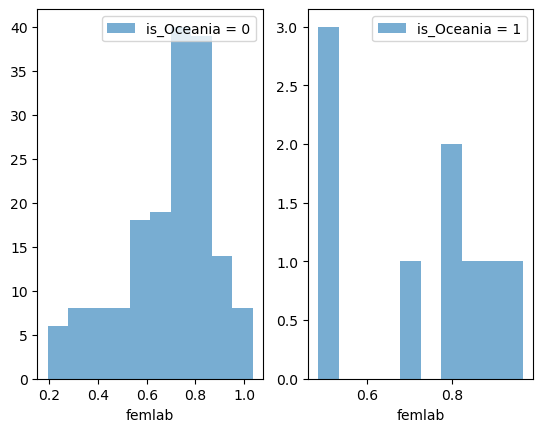

> Media Grupo 0 is_Oceania - literacy: 81.51596141228309 
> Media Grupo 1 is_Oceania - literacy: 81.98000030517578 
> La diferencia entre medias fue de: -0.4640388928926882 

> Valor t: -0.05211194697890982 
> Valor p: 0.9585176817316319 

> Hay diferencia estadistica: False


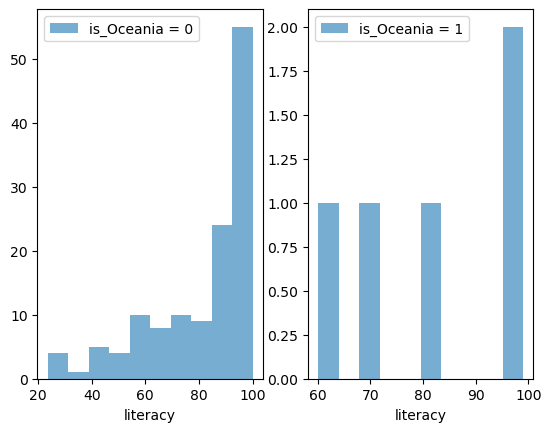

> Media Grupo 0 is_Oceania - school: 7.365904749461583 
> Media Grupo 1 is_Oceania - school: 8.715384740095876 
> La diferencia entre medias fue de: -1.3494799906342934 

> Valor t: -1.592662858961424 
> Valor p: 0.11293383755111722 

> Hay diferencia estadistica: False


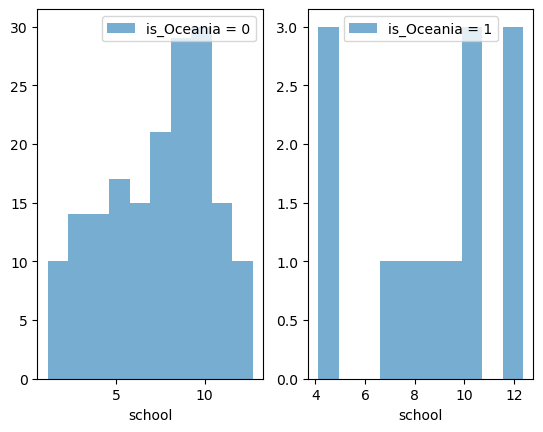

In [56]:
# femlab = Tasa entre hombres y mujeres en el mercado laboral
# literacy = Tasa de alfabetismo
# school = Promedio años de escolaridad

for continente in df.iloc[:, [-5, -4, -3, -2, -1]].columns:
    print('---------------------------------------------------------------------')
    for variable in variables:
        prueba_hipotesis(df, variable, continente)
        _ = graficar_histogramas_dos_poblaciones(df, variable, continente)


In [57]:
'''
Al analizar Africa, se pudieron observar los siguientes resultados:
    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente similar entre Africa y
    el resto del mundo
    - La tasa de alfabetismo es estadisticamente menor en Africa que en el resto del mundo
    - El promedio de años de escolaridad es estadisticamente menor en Africa que en el resto del
    mundo

Al analizar America, se pudieron observar los siguientes resultados:
    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente similar entre America
    y todo el mundo
    - La tasa de alfabetismo es estadisticamente similar entre America y el resto del mundo
    - El promedio de años de escolaridad es estadicamente similar entre America y el resto del
    mundo

Al analizar Asia, se pudieron observar los siguientes resultados:
    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente menor en Asia que en
    el resto del mundo
    - La tasa de alfabetismo es estadisticamente mayor en Asia que el resto del mundo
    - El promedio de años de escolaridad es estadicamente similar entre Asia y el resto del
    mundo

Al analizar Europe, se pudieron observar los siguientes resultados:
    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente mayor en Europa
    que en el resto del mundo (hay mas hombres trabajando en Europa que en todo el mundo)
    - La tasa de alfabetismo es estadisticamente mayor en Europa que en el resto del mundo
    - El promedio de años de escolaridad es estadisticamente mayor en Europa que en el 
    resto del mundo

Al analizar Oceania, se pudieron observar los siguientes resultados:
    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente similar entre Oceania
    y el resto del mundo
    - La tasa de alfabetismo es estadisticamente similar entre Oceania y el resto del mundo
    - El promedio de años de escolaridad es estadisticamente similar entre Oceania y el resto del
    mundo
'''

'\nAl analizar Africa, se pudieron observar los siguientes resultados:\n    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente similar entre Africa y\n    el resto del mundo\n    - La tasa de alfabetismo es estadisticamente menor en Africa que en el resto del mundo\n    - El promedio de años de escolaridad es estadisticamente menor en Africa que en el resto del\n    mundo\n\nAl analizar America, se pudieron observar los siguientes resultados:\n    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente similar entre America\n    y todo el mundo\n    - La tasa de alfabetismo es estadisticamente similar entre America y el resto del mundo\n    - El promedio de años de escolaridad es estadicamente similar entre America y el resto del\n    mundo\n\nAl analizar Asia, se pudieron observar los siguientes resultados:\n    - La tasa de hombres y mujeres en el mercado laboral es estadisticamente menor en Asia que en\n    el resto del mundo\n    - La tasa de 